<a href="https://colab.research.google.com/github/Alxn-z/Diplomado-Inteligencia-Artificial-PLN/blob/Aprendizaje-Supervisado/PerceptronMulticapa_sin_estandarizar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
vidrio=pd.read_csv("/content/glass.csv")

In [65]:
#Cree todo el proceso de Machine Learning(incluyendo visualización, correlación, descripción de la data, métricas)
#con el Perceptrón Multicapa, sin estandarizar.

In [66]:
vidrio

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [67]:
vidrio.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [68]:
vidrio.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [69]:
vidrio.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [70]:
f=vidrio[[	"Na", "Mg",	"Al",	"Si",	"Ca", "Type"]]
x=vidrio[["Na", "Mg",	"Al",	"Ca"]]
y=vidrio["Type"]

In [71]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 214 entries, 0 to 213
Series name: Type
Non-Null Count  Dtype
--------------  -----
214 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


In [72]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Na      214 non-null    float64
 1   Mg      214 non-null    float64
 2   Al      214 non-null    float64
 3   Si      214 non-null    float64
 4   Ca      214 non-null    float64
 5   Type    214 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 10.2 KB


In [73]:
print(vidrio.columns)

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')


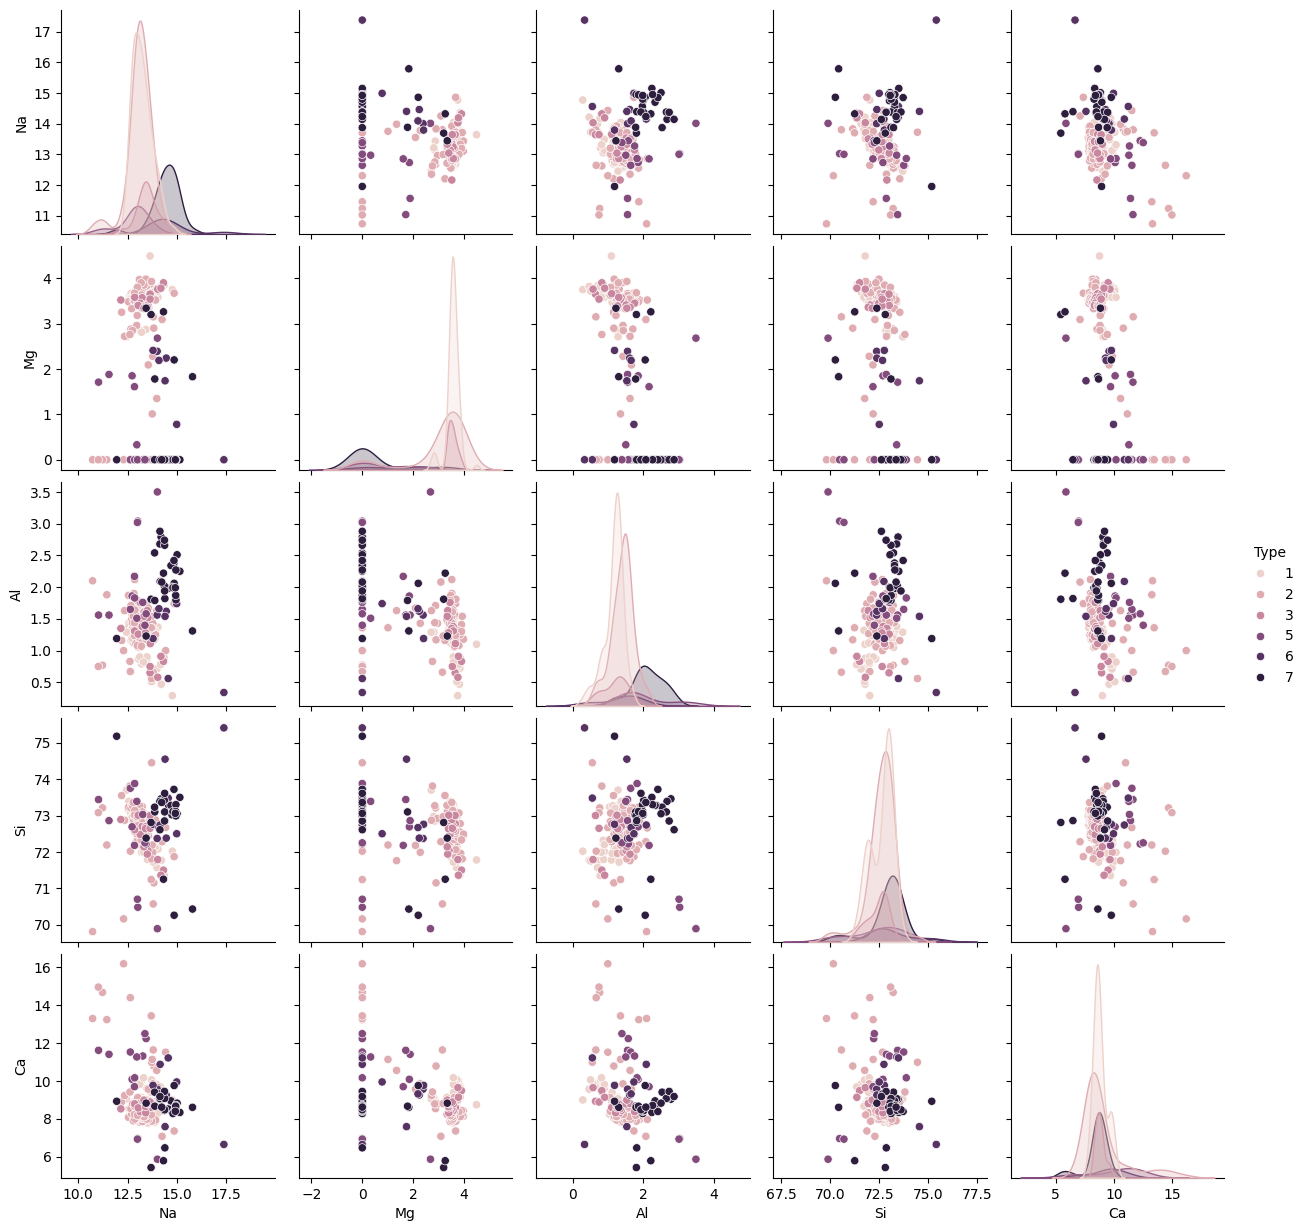

In [74]:
sns.pairplot(f, hue="Type")


<Axes: xlabel='Type', ylabel='Count'>

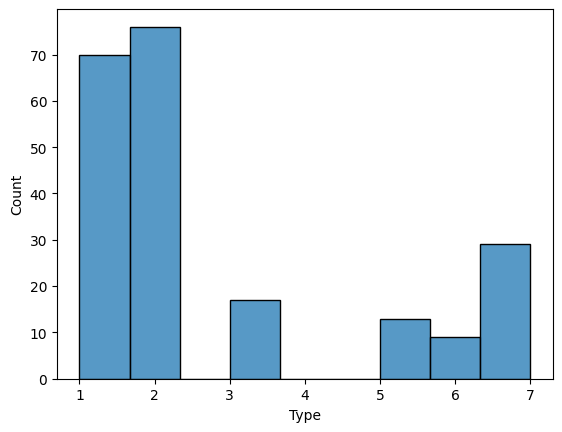

In [75]:
sns.histplot(vidrio,x="Type")

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [77]:
y.describe()

,Type
count,214.000000
mean,2.780374
std,2.103739
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,7.000000


In [78]:
from sklearn.neural_network import MLPClassifier

In [79]:
#clf = MLPClassifier(activation="logistic",hidden_layer_sizes=5,max_iter=300)
clf = MLPClassifier(max_iter=1000)

clf.fit(x_train, y_train)

MLPClassifier(max_iter=1000)

In [80]:
y_predTest=clf.predict(x_test)

In [81]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [82]:
mx=confusion_matrix(y_test,y_predTest)
mx

array([[12,  2,  0,  0,  0,  0],
       [ 4,  9,  0,  0,  1,  1],
       [ 3,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0,  6]])

In [83]:
print(classification_report(y_test,y_predTest))

              precision    recall  f1-score   support

           1       0.63      0.86      0.73        14
           2       0.75      0.60      0.67        15
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       0.50      0.50      0.50         2
           7       0.75      1.00      0.86         6

    accuracy                           0.70        43
   macro avg       0.61      0.60      0.59        43
weighted avg       0.66      0.70      0.67        43



In [84]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=100, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=1)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.predict_proba(X_test[:1])
ypredx=clf.predict(X_test[:5, :])
clf.score(X_test, y_test)

0.88